<a href="https://colab.research.google.com/github/gullyboy007/machine-learning-journey/blob/master/buy_sell_predict_using_RSI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#This program shows when to buy and sell stock using RSI

# Import the python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
#Load the data
from google.colab import files
uploaded = files.upload()
#Store the data
FB = pd.read_csv('FB.csv')
#Show the data
FB

Saving FB.csv to FB.csv


,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-06-13,175.529999,178.029999,174.610001,177.470001,177.470001,12253600
1,2019-06-14,180.509995,181.839996,180.000000,181.330002,181.330002,16773700
2,2019-06-17,185.009995,189.500000,184.410004,189.009995,189.009995,29459900
3,2019-06-18,194.000000,194.529999,187.279999,188.470001,188.470001,37571400
4,2019-06-19,187.000000,188.100006,184.550003,187.479996,187.479996,21417100
...,...,...,...,...,...,...,...
248,2020-06-08,229.029999,231.550003,227.410004,231.399994,231.399994,15466500
249,2020-06-09,231.520004,239.770004,230.410004,238.669998,238.669998,27462900
250,2020-06-10,240.960007,241.210007,235.279999,236.729996,236.729996,20720700
251,2020-06-11,229.940002,232.889999,223.550003,224.429993,224.429993,26708200


In [3]:
#Set the date as the index for the data
FB = FB.set_index(pd.DatetimeIndex(FB['Date'].values))
FB

,Date,Open,High,Low,Close,Adj Close,Volume
2019-06-13,2019-06-13,175.529999,178.029999,174.610001,177.470001,177.470001,12253600
2019-06-14,2019-06-14,180.509995,181.839996,180.000000,181.330002,181.330002,16773700
2019-06-17,2019-06-17,185.009995,189.500000,184.410004,189.009995,189.009995,29459900
2019-06-18,2019-06-18,194.000000,194.529999,187.279999,188.470001,188.470001,37571400
2019-06-19,2019-06-19,187.000000,188.100006,184.550003,187.479996,187.479996,21417100
...,...,...,...,...,...,...,...
2020-06-08,2020-06-08,229.029999,231.550003,227.410004,231.399994,231.399994,15466500
2020-06-09,2020-06-09,231.520004,239.770004,230.410004,238.669998,238.669998,27462900
2020-06-10,2020-06-10,240.960007,241.210007,235.279999,236.729996,236.729996,20720700
2020-06-11,2020-06-11,229.940002,232.889999,223.550003,224.429993,224.429993,26708200


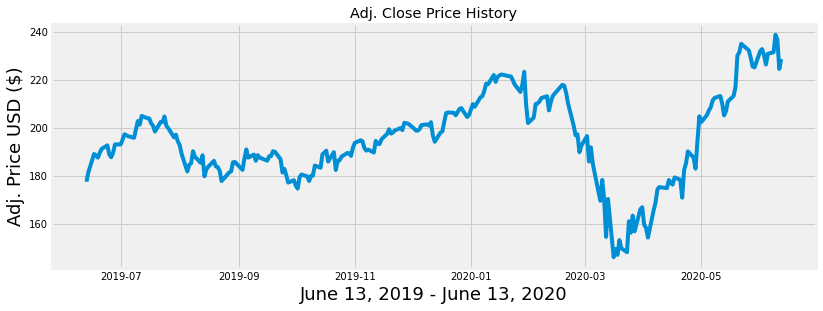

In [7]:
#Create and plot the graph
plt.figure(figsize=(12.2,4.5)) #width = 12.2in, height = 4.5
plt.plot( FB.index,FB['Adj Close'],  label='Adj Close')#plt.plot( X-Axis , Y-Axis, line_width, alpha_for_blending,  label)
plt.title('Adj. Close Price History')
plt.xlabel('June 13, 2019 - June 13, 2020',fontsize=18)
plt.ylabel('Adj. Price USD ($)',fontsize=18)
plt.show()

In [0]:
delta = FB['Adj Close'].diff(1) #Use diff() function to find the discrete difference over the column axis with period value equal to 1
delta = delta.dropna() # or delta[1:]
up =  delta.copy() #Make a copy of this object’s indices and data
down = delta.copy() #Make a copy of this object’s indices and data
up[up < 0] = 0 
down[down > 0] = 0 
time_period = 14
AVG_Gain = up.rolling(window=time_period).mean()
AVG_Loss = abs(down.rolling(window=time_period).mean())
RS = AVG_Gain / AVG_Loss
RSI = 100.0 - (100.0/ (1.0 + RS))

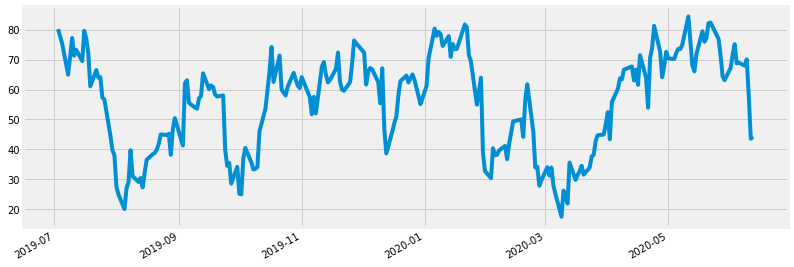

In [10]:
plt.figure(figsize=(12.2,4.5))
RSI.plot()
plt.show()

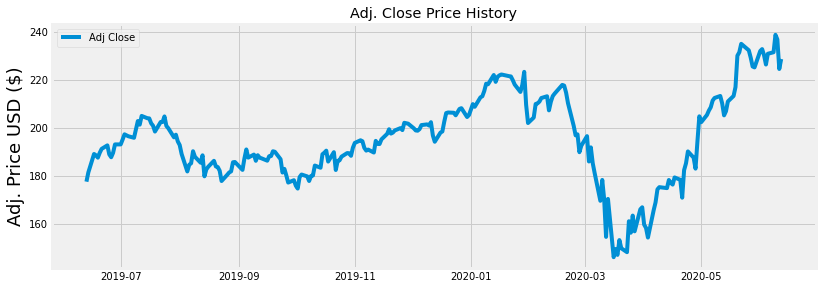

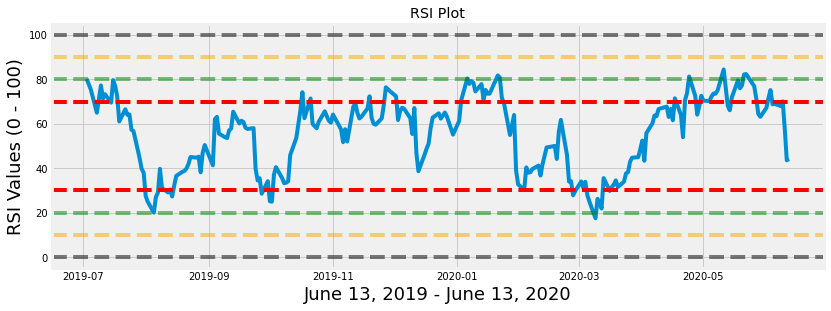

In [13]:
new_df = pd.DataFrame()
new_df['Adj Close'] = FB['Adj Close']
new_df['RSI'] = RSI
plt.figure(figsize=(12.2,4.5))
plt.plot(new_df.index, new_df['Adj Close'])
plt.title('Adj. Close Price History')
plt.ylabel('Adj. Price USD ($)',fontsize=18)
plt.legend(new_df.columns.values, loc='upper left')
plt.show()
plt.figure(figsize=(12.33,4.5))
plt.title('RSI Plot')
plt.plot(new_df.index, new_df['RSI'])
plt.axhline(0, linestyle='--', alpha=0.5, color = 'black')
plt.axhline(10, linestyle='--', alpha=0.5, color = 'orange')
plt.axhline(20, linestyle='--', alpha=0.5, color = 'green')
plt.axhline(30, linestyle='--',color = 'red')
plt.axhline(70, linestyle='--', color = 'red')
plt.axhline(80, linestyle='--', alpha=0.5, color = 'green')
plt.axhline(90, linestyle='--', alpha=0.5, color = 'orange')
plt.axhline(100, linestyle='--', alpha=0.5, color = 'black')
plt.xlabel('June 13, 2019 - June 13, 2020',fontsize=18)
plt.ylabel('RSI Values (0 - 100)',fontsize=18)
plt.show()